In [7]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from gensim.utils import simple_preprocess


In [8]:
dataset = pd.read_csv('/Users/test/Desktop/news_cato/dataset/combined_csv copy.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})
ds = pd.read_csv('/Users/test/Desktop/news_cato/dataset/economic_times_data_2023-2.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})

In [9]:
dataset

,headline,category
0,Numerology Reading 19 May 2021,"OTT, Gaming & Digital Content"
1,Hyundai Venue N Line Launch Date: 2022 Hyundai...,Auto & Ancillary
2,2022 Hyundai Venue Vs Nexon Vs XUV300 Vs Magni...,Auto & Ancillary
3,2022 Kia Sportage SUV breaks cover with safety...,Auto & Ancillary
4,"2022 Kia Telluride gets safety, comfort updates",Auto & Ancillary
...,...,...
68265,"Meta acquires 3D smart glass maker Luxexcel, T...",Communications
68266,Vodafone Idea rolls out new data add-on plans ...,Communications
68267,Google to pay Indiana $20 million to resolve p...,Communications
68268,India may review stance on Chinese investments...,Communications


In [10]:
ds

,headline,category
0,"Manish Sisodias CBI custody ends, to be produc...",Liquor & Tobacco
1,Germany unveils immigration plan to tackle lab...,BFSI
2,"H-1B visa-holders spouses can work in US, says...",BFSI
3,Arvind Kejriwal asks Delhi LG to pay attention...,E-Commerce & IT
4,Govt open to investing more in the India Semic...,E-Commerce & IT
...,...,...
26395,Bigg Boss OTT Season 2 Finale: Tune in now for...,"OTT, Gaming & Digital Content"
26396,"Kygo at Gunnersbury Park: Date, duration, kick...",FMCG
26397,PM Narendra Modis I-Day Speech lays blueprint ...,FMCG
26398,PM Modi lays foundation for Sant Ravidas templ...,FMCG


In [11]:
ds.head(20), ds.tail(20)

(                                             headline  \
 0   Manish Sisodias CBI custody ends, to be produc...   
 1   Germany unveils immigration plan to tackle lab...   
 2   H-1B visa-holders spouses can work in US, says...   
 3   Arvind Kejriwal asks Delhi LG to pay attention...   
 4   Govt open to investing more in the India Semic...   
 5   Thieves hide Rs 15-crore stolen rare diamond i...   
 6   Indices: Stock market update: Nifty Auto index...   
 7   Nykaa shares can rally up to 46% as buy calls ...   
 8   Boris Johnson quits as UK lawmaker after being...   
 9   Expanding bilateral space sector cooperation h...   
 10  For investors with higher risk appetite: 5 lar...   
 11  Boris Johnson deliberately misled parliament, ...   
 12  Google Chrome will stop working on Windows PC ...   
 13  View: India needs to focus on tracks before tr...   
 14  Google will soon allow users to control Spotif...   
 15  Kraven the Hunter trailer, first look, release...   
 16  Google ch

In [12]:
dataset.isnull().sum()

headline    84
category     0
dtype: int64

In [13]:
ds.isnull().sum()

headline    0
category    0
dtype: int64

In [14]:
dataset.dropna(inplace = True)

In [15]:
ds.dropna(inplace = True)

In [16]:
dataset.category.value_counts()

FMCG                             12892
Health & Wellness                 8743
Auto & Ancillary                  6447
E-Commerce & IT                   6348
Handsets                          5570
BFSI                              5330
Communications                    5042
OTT, Gaming & Digital Content     3840
Retail                            2862
Construction & Real Estate        2025
Fashion & Lifestyle               1709
Liquor & Tobacco                  1500
Internet based service            1459
Consumer Electronics              1197
Ed-Tech                           1150
E-health                          1075
Media & Entertainment              997
Name: category, dtype: int64

In [17]:
dataset.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
dataset.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
dataset.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
dataset.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
dataset.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
dataset.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
dataset.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
dataset.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
dataset.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
dataset.category.replace("Internet based service", "Internet_based_service", inplace=True)

dataset.category.unique()

array(['OTT,_Gaming_&_Digital_Content', 'Auto_&_Ancillary', 'FMCG',
       'E-health', 'Internet_based_service', 'Retail',
       'Consumer_Electronics', 'Ed-Tech', 'Liquor_&_Tobacco',
       'Fashion_&_Lifestyle', 'Handsets', 'E-Commerce_&_IT',
       'Construction_&_Real_Estate', 'BFSI', 'Health_&_Wellness',
       'Communications', 'Media_&_Entertainment'], dtype=object)

In [18]:
ds.category.value_counts()

Health & Wellness                5081
Auto & Ancillary                 3438
Communications                   3333
BFSI                             3299
E-Commerce & IT                  2562
FMCG                             2507
Retail                           1497
Handsets                         1212
OTT, Gaming & Digital Content    1084
Fashion & Lifestyle               453
Construction & Real Estate        436
Media & Entertainment             340
Liquor & Tobacco                  256
Consumer Electronics              254
E-health                          230
Internet based service            224
Ed-Tech                           194
Name: category, dtype: int64

In [19]:
ds.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
ds.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
ds.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
ds.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
ds.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
ds.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
ds.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
ds.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
ds.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
ds.category.replace("Internet based service", "Internet_based_service", inplace=True)

ds.category.unique()

array(['Liquor_&_Tobacco', 'BFSI', 'E-Commerce_&_IT', 'Auto_&_Ancillary',
       'FMCG', 'OTT,_Gaming_&_Digital_Content', 'Health_&_Wellness',
       'Communications', 'Internet_based_service', 'Fashion_&_Lifestyle',
       'Handsets', 'Retail', 'Consumer_Electronics',
       'Construction_&_Real_Estate', 'E-health', 'Media_&_Entertainment',
       'Ed-Tech'], dtype=object)

<Axes: >

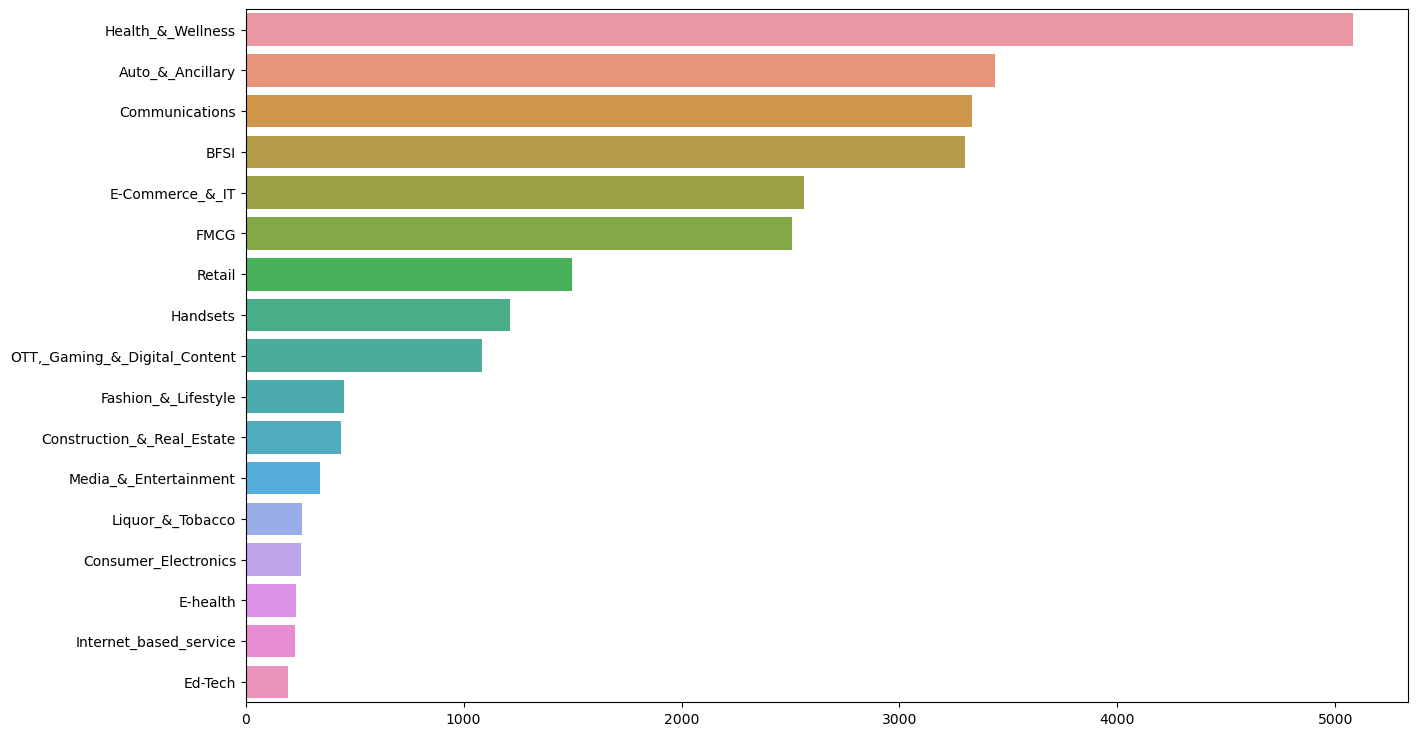

In [20]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = ds['category'].value_counts().values,y=ds['category'].value_counts().index)

In [21]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

In [22]:
#tags
def remove_tags(headline):
    remove = re.compile(r'')
    return re.sub(remove, '', headline)
dataset['headline'] = dataset['headline'].apply(remove_tags)
ds['headline'] = ds['headline'].apply(remove_tags)

In [23]:
#special char
def special_char(headline):
    reviews = ''
    for x in headline:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['headline'] = dataset['headline'].apply(special_char)
ds['headline'] = ds['headline'].apply(special_char)

In [24]:
#lower case
def convert_lower(headline):
    return headline.lower()
dataset['headline'] = dataset['headline'].apply(convert_lower)
ds['headline'] = ds['headline'].apply(convert_lower)

In [25]:
#stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [26]:
#tokens
def remove_stopwords(headline):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(headline)
    return [x for x in words if x not in stop_words]
dataset['headline'] = dataset['headline'].apply(remove_stopwords)
ds['headline'] = ds['headline'].apply(remove_stopwords)

In [27]:
#lemmatization
def lemmatize_word(headline):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in headline])
dataset['headline'] = dataset['headline'].apply(lemmatize_word)
ds['headline'] = ds['headline'].apply(lemmatize_word)

In [28]:
dataset

,headline,category
0,numerology reading 19 may 2021,"OTT,_Gaming_&_Digital_Content"
1,hyundai venue n line launch date 2022 hyundai ...,Auto_&_Ancillary
2,2022 hyundai venue v nexon v xuv300 v magnite ...,Auto_&_Ancillary
3,2022 kia sportage suv break cover safety update,Auto_&_Ancillary
4,2022 kia telluride get safety comfort update,Auto_&_Ancillary
...,...,...
68265,meta acquires 3d smart glass maker luxexcel te...,Communications
68266,vodafone idea roll new data add plan ad free m...,Communications
68267,google pay indiana 20 million resolve privacy ...,Communications
68268,india may review stance chinese investment hel...,Communications


In [29]:
ds['category'].unique()

array(['Liquor_&_Tobacco', 'BFSI', 'E-Commerce_&_IT', 'Auto_&_Ancillary',
       'FMCG', 'OTT,_Gaming_&_Digital_Content', 'Health_&_Wellness',
       'Communications', 'Internet_based_service', 'Fashion_&_Lifestyle',
       'Handsets', 'Retail', 'Consumer_Electronics',
       'Construction_&_Real_Estate', 'E-health', 'Media_&_Entertainment',
       'Ed-Tech'], dtype=object)

In [30]:
dataset.iloc[:, 1] = dataset.iloc[:, 1].apply(lambda x: '__label__' + x)
ds.iloc[:, 1] = ds.iloc[:, 1].apply(lambda x: '__label__' + x)

In [31]:
dataset

,headline,category
0,numerology reading 19 may 2021,"__label__OTT,_Gaming_&_Digital_Content"
1,hyundai venue n line launch date 2022 hyundai ...,__label__Auto_&_Ancillary
2,2022 hyundai venue v nexon v xuv300 v magnite ...,__label__Auto_&_Ancillary
3,2022 kia sportage suv break cover safety update,__label__Auto_&_Ancillary
4,2022 kia telluride get safety comfort update,__label__Auto_&_Ancillary
...,...,...
68265,meta acquires 3d smart glass maker luxexcel te...,__label__Communications
68266,vodafone idea roll new data add plan ad free m...,__label__Communications
68267,google pay indiana 20 million resolve privacy ...,__label__Communications
68268,india may review stance chinese investment hel...,__label__Communications


In [32]:
ds.head(50)

,headline,category
0,manish sisodias cbi custody end produced court...,__label__Liquor_&_Tobacco
1,germany unveils immigration plan tackle labour...,__label__BFSI
2,h 1b visa holder spouse work u say judge,__label__BFSI
3,arvind kejriwal asks delhi lg pay attention im...,__label__E-Commerce_&_IT
4,govt open investing india semiconductor missio...,__label__E-Commerce_&_IT
5,thief hide r 15 crore stolen rare diamond elec...,__label__Liquor_&_Tobacco
6,index stock market update nifty auto index fal...,__label__Auto_&_Ancillary
7,nykaa share rally 46 buy call get louder,__label__E-Commerce_&_IT
8,boris johnson quits uk lawmaker told sanctione...,__label__FMCG
9,expanding bilateral space sector cooperation h...,__label__FMCG


In [33]:
import csv 

In [34]:
# Saving the CSV file as a text file to train/test the classifier
dataset[['category', 'headline']].to_csv('train3.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " "
                                        )

ds[['category', 'headline']].to_csv('test3.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " "
                                   )

In [35]:
import fasttext

In [36]:
model = fasttext.train_supervised('train3.txt', wordNgrams = 3, epoch = 400, lr = 0.8)

Read 0M words
Number of words:  31927
Number of labels: 17
Progress: 100.0% words/sec/thread:  633257 lr:  0.000000 avg.loss:  0.045393 ETA:   0h 0m 0s 12.3% words/sec/thread:  601775 lr:  0.701233 avg.loss:  0.127167 ETA:   0h 2m42s 15.6% words/sec/thread:  613070 lr:  0.675410 avg.loss:  0.115912 ETA:   0h 2m34s 29.2% words/sec/thread:  589180 lr:  0.566051 avg.loss:  0.083900 ETA:   0h 2m14s 31.8% words/sec/thread:  591525 lr:  0.545511 avg.loss:  0.081250 ETA:   0h 2m 8s 32.6% words/sec/thread:  593538 lr:  0.539322 avg.loss:  0.080465 ETA:   0h 2m 7s 33.6% words/sec/thread:  596068 lr:  0.531570 avg.loss:  0.079455 ETA:   0h 2m 4s 83.2% words/sec/thread:  631099 lr:  0.134026 avg.loss:  0.050724 ETA:   0h 0m29s


In [37]:
model.save_model("news2.bin")

In [38]:
model.test('test3.txt') 

(26400, 0.835, 0.835)

In [39]:
result = model.test('test3.txt')

precision = result[1]  # Precision
recall = result[2]     # Recall
accuracy = (precision + recall) / 2 

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [40]:
model.predict(ds.iloc[899, 0])

(('__label__Auto_&_Ancillary',), array([1.00001001]))

                               precision    recall  f1-score   support

            Health_&_Wellness       0.94      0.93      0.93      5081
                         FMCG       0.53      0.79      0.64      2507
          Fashion_&_Lifestyle       0.66      0.46      0.55       453
              E-Commerce_&_IT       0.86      0.89      0.88      2562
       Internet_based_service       0.50      0.30      0.38       224
         Consumer_Electronics       0.66      0.33      0.44       254
                     E-health       0.58      0.20      0.30       230
        Media_&_Entertainment       0.72      0.36      0.48       340
             Liquor_&_Tobacco       0.86      0.57      0.68       256
                     Handsets       0.71      0.73      0.72      1212
   Construction_&_Real_Estate       0.73      0.53      0.61       436
             Auto_&_Ancillary       0.91      0.91      0.91      3438
                         BFSI       0.92      0.87      0.90      3299
OTT,_

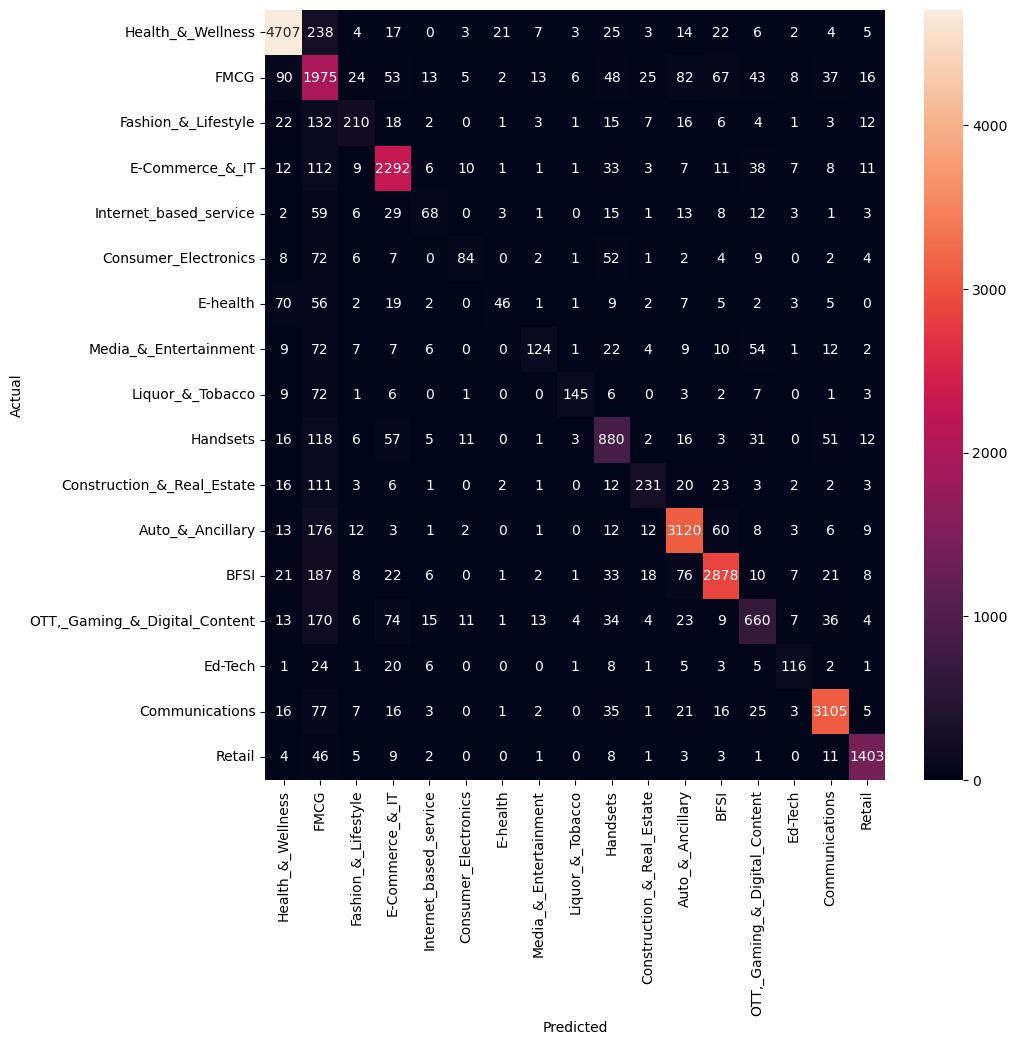

Accuracy: 0.835


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

predictions = model.predict(list(ds['headline']))

true_labels = ds['category'].str.replace('__label__', '', regex=False).to_list()

predicted_labels = [label[0].replace('__label__', '') for label in predictions[0]]

your_category_names = list(set(true_labels))

class_mapping = {label: idx for idx, label in enumerate(your_category_names)}



true_labels_indices = [class_mapping[label] for label in true_labels]
predicted_labels_indices = [class_mapping[label] for label in predicted_labels]

report = classification_report(true_labels_indices, predicted_labels_indices, target_names=your_category_names)
print(report)



conf_mat = confusion_matrix(true_labels_indices, predicted_labels_indices)


fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=your_category_names, yticklabels=your_category_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

result2 = accuracy_score(true_labels_indices, predicted_labels_indices)
print("Accuracy:", result2)


In [42]:
result2= accuracy_score(true_labels, predicted_labels)
result2

0.835

In [43]:
import fasttext

train_file = 'train3.txt'
autotune_duration = 600  
model = fasttext.train_supervised(
    input=train_file,
#     autotuneValidationFile=0.1, 
    autotuneDuration=autotune_duration,
    autotuneMetric="recall", 
    autotuneModelSize="2M",
)

model.save_model("tuned_model.bin")

result = model.test('test3.txt')
precision = result[1]
recall = result[2]     
accuracy = (precision + recall) / 2

print(f"Accuracy: {accuracy:.2f}")


Read 0M words
Number of words:  31927
Number of labels: 17
Progress: 100.0% words/sec/thread:  971682 lr:  0.000000 avg.loss:  0.998582 ETA:   0h 0m 0s

Accuracy: 0.83


0s
